In [1]:
import numpy as np
import torch

In [2]:
pred = np.load('preds.npy')

In [8]:
preds = []
for i in range(len(pred)):
    preds.extend(pred[i].cpu().numpy().tolist())

In [10]:
target = np.load('/data2/embryo/val/labelIndex.npy')

In [13]:
np.sum(target == preds)

18408

In [14]:
len(target)

21798

In [16]:
1.0*18408/21798*1.0

0.8444811450591797

In [17]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1809   33    0    0    0    6]
 [  58  953   31    0    2    0]
 [  26   19 3878  163  155   55]
 [   0    0  213  232  216   57]
 [   0    0  148   98 3591  879]
 [   0    0   64   47 1120 7945]]


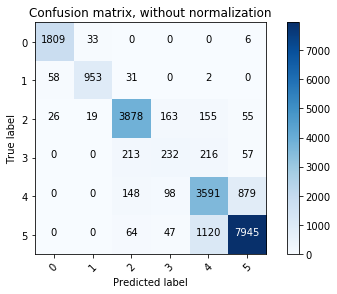

In [21]:
cnf_matrix = confusion_matrix(target, preds)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(6),
                      title='Confusion matrix, without normalization')
plt.show()